## Yelp Dataset

Businesses and customers both depend on online reviews to make choices. It's crucial for companies to understand what customers think to make sure they're satisfied and to help developing business plans.

We desired to understand huge amount of feedback online, and this report will show why the detailed customers reviews in Yelp reviews matter.

This dataset is part of Yelp's big collection of information about businesses, reviews, and users.

We sourced our dataset here: https://www.yelp.com/dataset.

We took 100,000 reviews out of a larger group of 6,990,280 reviews. This smaller dataset includes information about businesses in eight big cities in the USA and Canada.

In the huge number of online reviews, finding patterns and useful insights is very important. This analysis will show why it important to look closely at the opinions customers express in Yelp reviews.

We begin by conducting exploratory data analysis for this dataset.

Then, we delve into text mining analysis using various techniques such as topic modeling, word2vec, and bag-of-word n-grams predictive analysis.

We'll look for trends in what customers are saying and what they like or dislike. We're going to use a mix of data analysis and text mining techniques to understand what the reviews are saying.

We apply five different models: Bag-of-Words with MultimonilalNB, TFIDF with Multinominal Naive, Pretrained Naive Bayes, LSTM, and RNN to predict customers sentiments.

This research is useful as it showcases customers what makes people happy or unhappy with a product or service. Businesses can use this to make things better for their customers. Customers get a summary of what everyone thinks, which helps them decide what to buy or use.






## 1. Data Collection



In [ ]:
import pandas as pd

# Initialize an empty list to store data chunks
data_chunks = []

# Number of rows to read in each iteration
chunk_size = 10000

# Number of desired rows and columns
target_rows = 100000

# Loop until we have enough rows
while len(data_chunks) * chunk_size < target_rows:
    # Read a chunk of data from the CSV file
    chunk = pd.read_csv("Yelp_dataset.csv", nrows=chunk_size)

    # Append the chunk to the list
    data_chunks.append(chunk)

# Concatenate the data chunks into a single DataFrame
yelp_dataset = pd.concat(data_chunks, ignore_index=True)

# Ensure that the DataFrame has exactly 100,000 rows
yelp_dataset = yelp_dataset.head(target_rows)

In [ ]:
yelp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          100000 non-null  object 
 1   address       99180 non-null   object 
 2   city          100000 non-null  object 
 3   state         100000 non-null  object 
 4   postal_code   100000 non-null  object 
 5   latitude      100000 non-null  float64
 6   longitude     100000 non-null  float64
 7   stars_x       100000 non-null  float64
 8   review_count  100000 non-null  int64  
 9   is_open       100000 non-null  int64  
 10  attributes    98710 non-null   object 
 11  categories    100000 non-null  object 
 12  hours         94500 non-null   object 
 13  review_id     100000 non-null  object 
 14  user_id       100000 non-null  object 
 15  stars_y       100000 non-null  int64  
 16  useful        100000 non-null  int64  
 17  funny         100000 non-null  int64  
 18  cool 

## 2. Exploratory Data Analysis

In [ ]:
yelp_dataset[['categories', 'review_count','name']]

,categories,review_count,name
0,"Doctors, Traditional Chinese Medicine, Naturop...",7,"Abby Rappoport, LAC, CMQ"
1,"Shipping Centers, Local Services, Notaries, Ma...",15,The UPS Store
2,"Shipping Centers, Local Services, Notaries, Ma...",15,The UPS Store
3,"Shipping Centers, Local Services, Notaries, Ma...",15,The UPS Store
4,"Department Stores, Shopping, Fashion, Home & G...",22,Target
...,...,...,...
99995,"Food, Shopping, Tobacco Shops, Beer, Wine & Sp...",117,"Midtown Corkdorks Wine, Spirits & Beer"
99996,"Food, Shopping, Tobacco Shops, Beer, Wine & Sp...",117,"Midtown Corkdorks Wine, Spirits & Beer"
99997,"Venues & Event Spaces, Italian, Event Planning...",218,Andrea's Restaurant
99998,"Venues & Event Spaces, Italian, Event Planning...",218,Andrea's Restaurant


### Bar chart for top 5 business categories

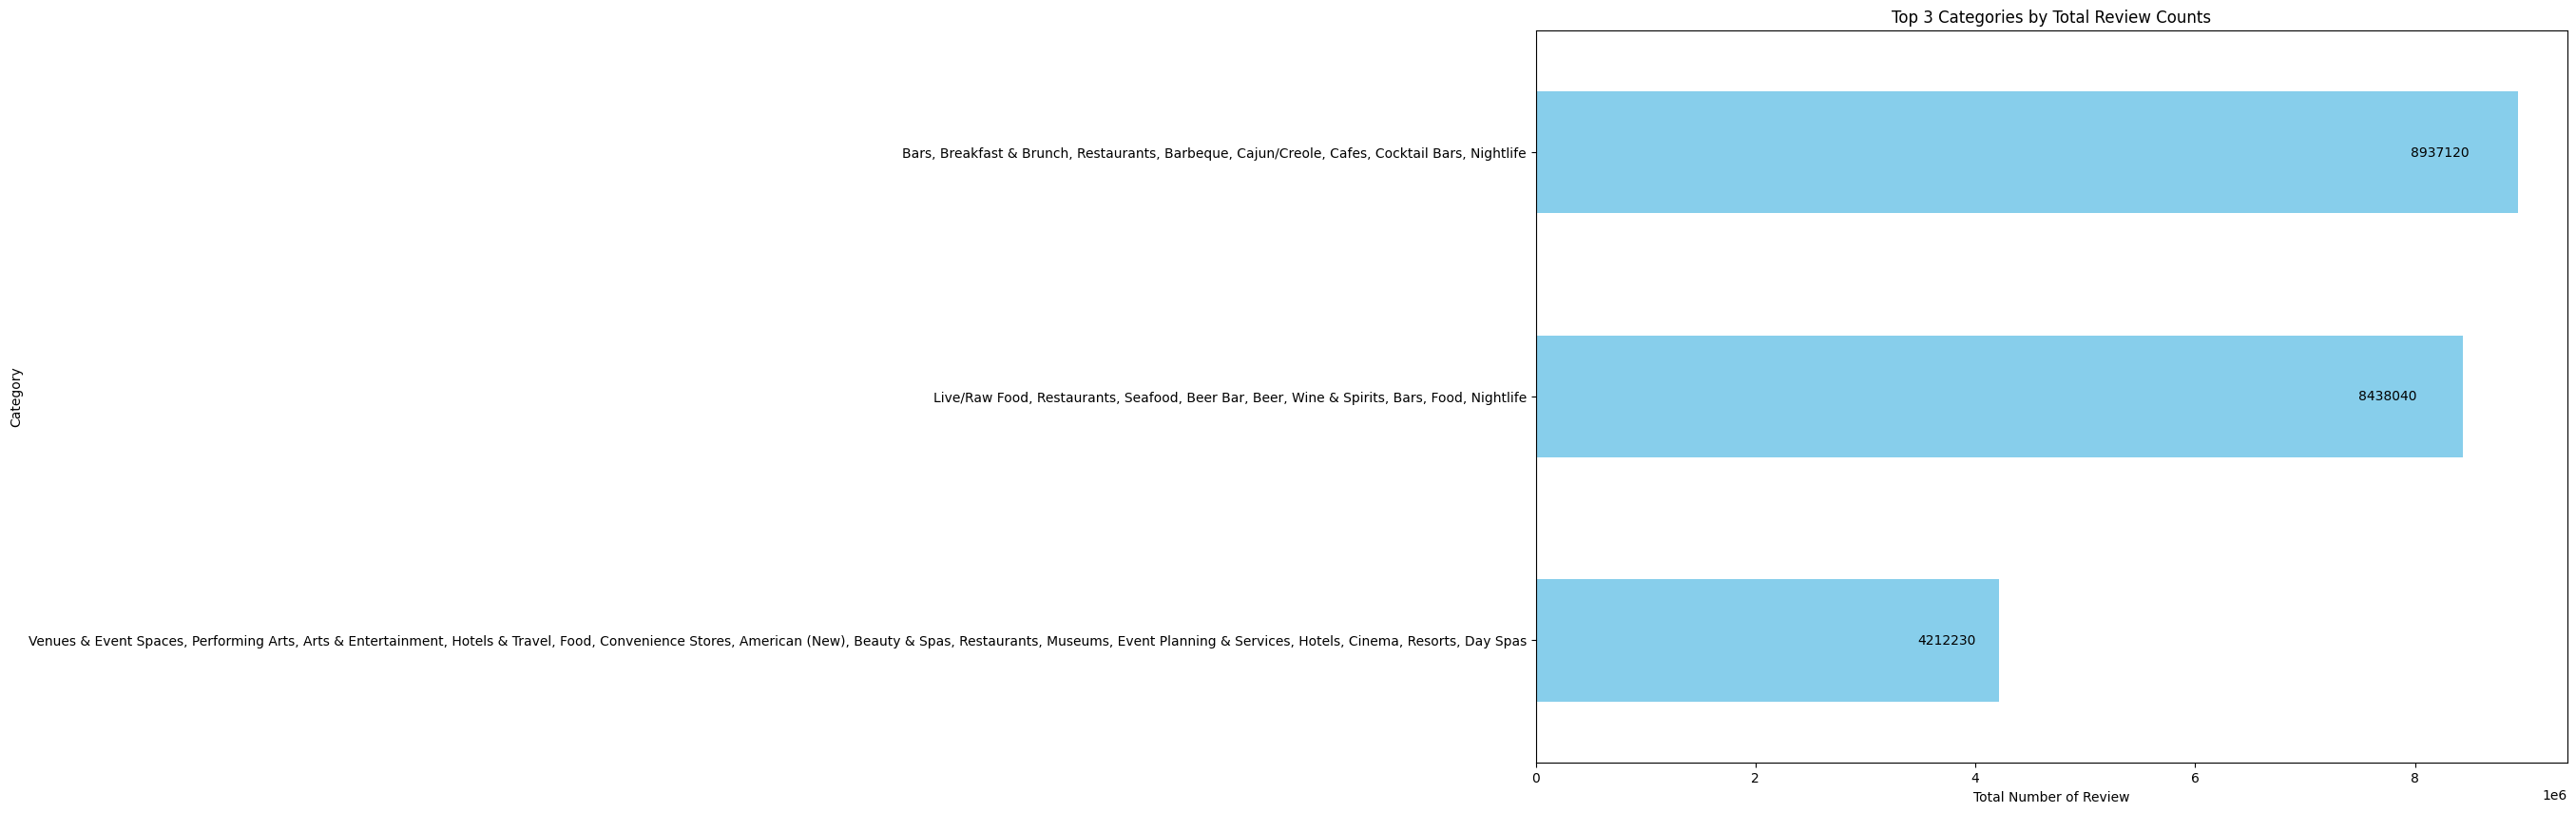

In [ ]:
import matplotlib.pyplot as plt

# Assuming yelp_dataset is your DataFrame
# Grouping by 'categories' and summing up the 'review_count' for each category
category_review_counts = yelp_dataset.groupby('categories')['review_count'].sum()

# Sorting categories by review count in descending order
category_review_counts = category_review_counts.sort_values(ascending=False)

# Selecting top 3 categories
top_categories = category_review_counts.head(3)

# Plotting
plt.figure(figsize=(14, 10))
bars = top_categories[::-1].plot(kind='barh', color='skyblue')  # Reverse the order for horizontal bar chart
plt.title('Top 3 Categories by Total Review Counts')
plt.xlabel('Total Number of Review')
plt.ylabel('Category')

# Add data labels
for bar in bars.patches:
    # Get the width of the bar
    width = bar.get_width()
    # Add text annotation on the bar with a slight left offset
    plt.text(width - 0.05 * width, bar.get_y() + bar.get_height() / 2, f'{width:.0f}', ha='right', va='center')

plt.show()

**Dining & Nightlife:** This category has the most reviews, totaling about 8.93 million. It includes various options for eating out and enjoying nightlife, showing high customer interest.

**Seafood & Beverages:** The second category has around 8.43 million reviews, indicating a strong presence in the food and beverage industry, especially for seafood and places serving alcohol.

**Diverse Services:** With approximately 4.21 million reviews, this category covers a wide range of services, from event spaces and hotels to arts, entertainment, and different types of dining options.

### Rating Distribution across Yelp Reviews

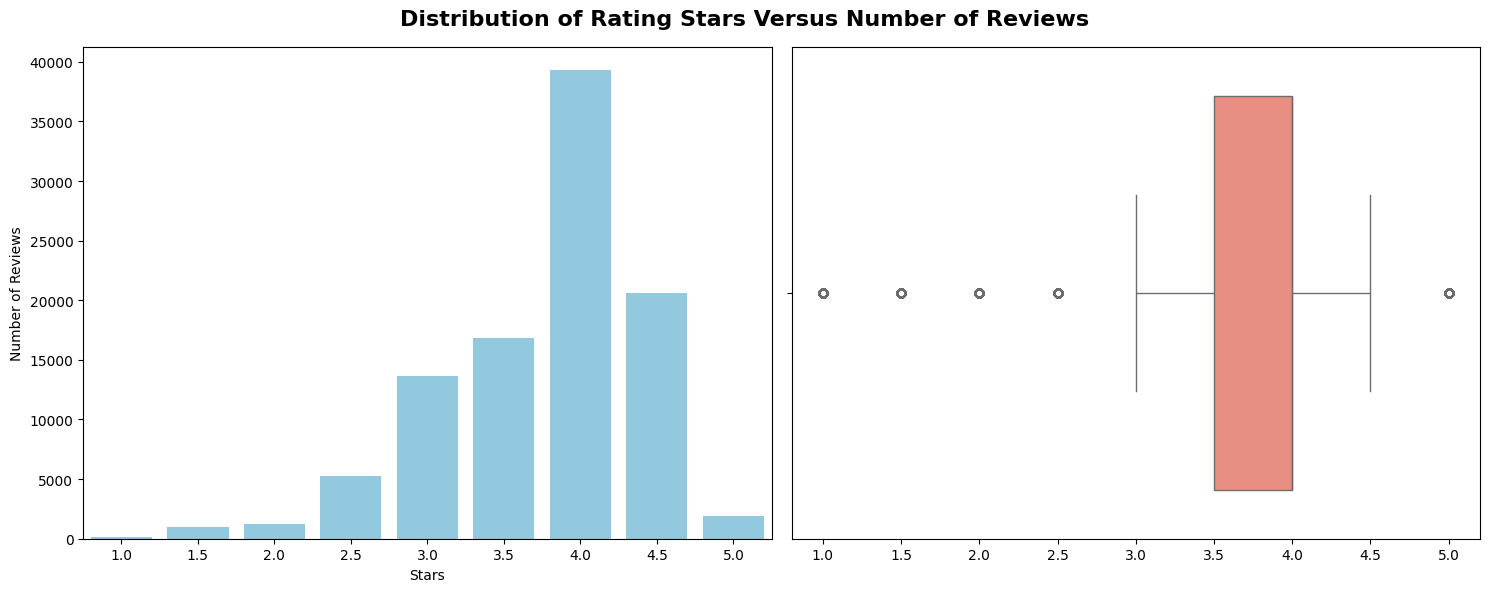

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming yelp_dataset is your DataFrame

# Plotting two charts side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Adding a big title above the subplots
fig.suptitle('Distribution of Rating Stars Versus Number of Reviews', fontsize=16, fontweight='bold')

# 1: Plotting a bar plot to see distribution of stars and total number of reviews.
sns.countplot(x='stars_x', data=yelp_dataset, ax=axes[0], color='skyblue')
axes[0].set_xlabel('Stars')
axes[0].set_ylabel('Number of Reviews')

# 2: Plotting the rating distribution using a boxplot
sns.boxplot(x='stars_x', data=yelp_dataset, ax=axes[1], color='salmon')


# Hide x-axis label on the second subplot
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Hide y-axis labels on the second subplot
axes[1].set_yticklabels([])

plt.tight_layout()
plt.show()

In Yelp reviews, most ratings are positive, typically around 4 stars. There are more moderate ratings (3-4 stars) than extreme ones.

In the box plot, outliers on the lower end may suggest very negative experiences or, while outliers on the higher end could indicate exceptionally good experiences or less critical reviewers.

### Sentiment and Star Rating Distribution

In [ ]:
yelp_dataset.loc[yelp_dataset['stars_x'] == 3, 'sentiment'] = 'neutral'
yelp_dataset.loc[yelp_dataset['stars_x'] < 3, 'sentiment'] = 'negative'
yelp_dataset.loc[yelp_dataset['stars_x'] > 3, 'sentiment'] = 'positive'

In [ ]:
sentiment_df = yelp_dataset[['stars_x','sentiment', 'text']]
sentiment_df

,stars_x,sentiment,text
0,5.0,positive,I've had acupuncture treatments with Abby over...
1,3.0,neutral,I have a po box there and ea. visit I am greet...
2,3.0,neutral,"Bottom Line: \nClean store, Quick Service, Go..."
3,3.0,neutral,I went in to ship a package to my friend for h...
4,3.5,positive,We are fans of Target. They seem to have a li...
...,...,...,...
99995,4.0,positive,Two reasons for the 5-star rating: 1. They are...
99996,4.0,positive,Omg it's like booze heaven. And! They have a f...
99997,2.5,negative,We attended a private party recently. The app...
99998,2.5,negative,"Walking in, it took a bit to be greeted and se..."


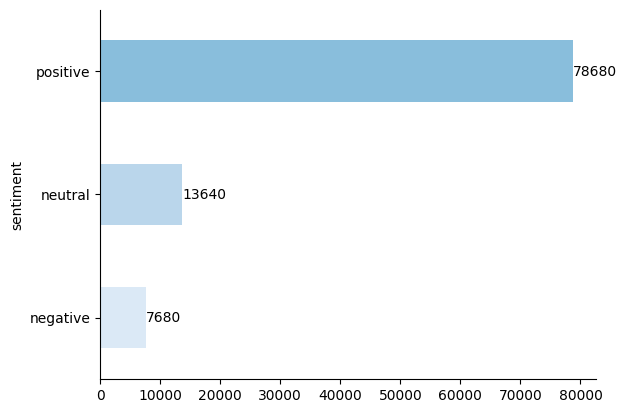

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming sentiment_df is your DataFrame
sentiment_counts = sentiment_df.groupby('sentiment').size()

# Plotting the horizontal bar plot
ax = sentiment_counts.plot(kind='barh', color=sns.palettes.mpl_palette('Blues'))

# Adding data labels to each bar
for i, count in enumerate(sentiment_counts):
    ax.text(count, i, str(count), ha='left', va='center')

# Removing top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()


The dataset indicates a substantially higher number of positive reviews (78,680) compared to neutral (13,640) and negative reviews (7,680), suggesting customers are largely satisfied with their experiences.

In [ ]:
yelp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          100000 non-null  object 
 1   address       99180 non-null   object 
 2   city          100000 non-null  object 
 3   state         100000 non-null  object 
 4   postal_code   100000 non-null  object 
 5   latitude      100000 non-null  float64
 6   longitude     100000 non-null  float64
 7   stars_x       100000 non-null  float64
 8   review_count  100000 non-null  int64  
 9   is_open       100000 non-null  int64  
 10  attributes    98710 non-null   object 
 11  categories    100000 non-null  object 
 12  hours         94500 non-null   object 
 13  review_id     100000 non-null  object 
 14  user_id       100000 non-null  object 
 15  stars_y       100000 non-null  int64  
 16  useful        100000 non-null  int64  
 17  funny         100000 non-null  int64  
 18  cool 

### Histogram for Best Restaurants based on average star rating

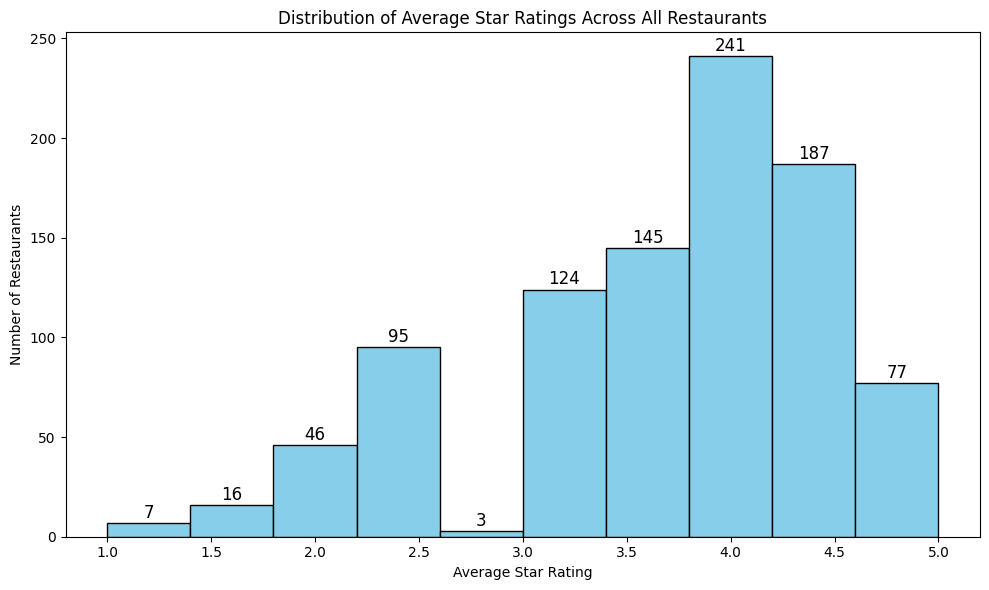

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average ratings for each restaurant
avg_ratings = yelp_dataset.groupby('name')['stars_x'].mean()

# Set up the figure for plotting
plt.figure(figsize=(10, 6))

# Plotting the histogram of average star ratings
n, bins, patches = plt.hist(avg_ratings, bins=10, color='skyblue', edgecolor='black')  # Collect bin information

# Adding titles and labels
plt.title('Distribution of Average Star Ratings Across All Restaurants')
plt.xlabel('Average Star Rating')
plt.ylabel('Number of Restaurants')

# Label each bin
for i in range(len(n)):
    plt.text(bins[i]+0.2, n[i] + 0.6, str(int(n[i])), fontsize=12, ha='center', va='bottom')

# Ensure everything fits without overlapping
plt.tight_layout()

# Display the plot
plt.show()


The bar chart shows that the majority of restaurants have received a 4-star average rating, with the number peaking at 241 restaurants. This suggests that most establishments are performing well, achieving high customer satisfaction overall.

### Line chart for Year trend of count of reviews

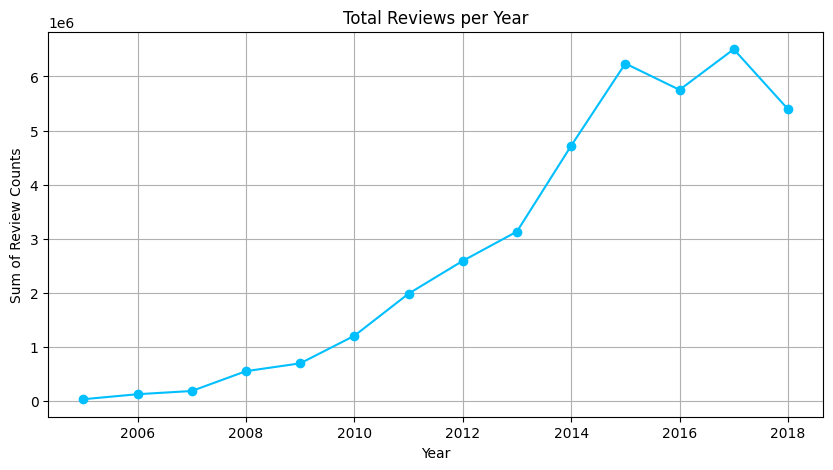

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Converting date strings to datetime objects
yelp_dataset['date'] = pd.to_datetime(yelp_dataset['date'])

# Extracting year from the datetime
yelp_dataset['year'] = yelp_dataset['date'].dt.year

# Grouping by year and summing review counts
yearly_review_sum = yelp_dataset.groupby('year')['review_count'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(yearly_review_sum['year'], yearly_review_sum['review_count'], marker='o',color='deepskyblue')
plt.title('Total Reviews per Year')
plt.xlabel('Year')

plt.ylabel('Sum of Review Counts')
plt.grid(True)
plt.show()

The line graph illustrates a clear upward trend in the total number of reviews from 2006 to 2018, with a slight dip after 2016. This suggests a growing user engagement over the years on the platform.

### Line chart for Month trend of count of reviews

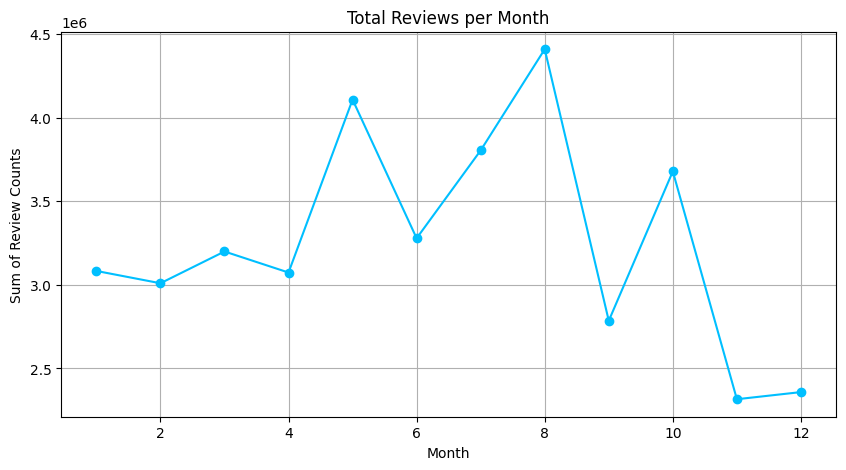

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Converting date strings to datetime objects
yelp_dataset['date'] = pd.to_datetime(yelp_dataset['date'])

# Extracting month from the datetime
yelp_dataset['month'] = yelp_dataset['date'].dt.month

# Grouping by month and summing review counts
month_review_sum = yelp_dataset.groupby('month')['review_count'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(month_review_sum['month'], month_review_sum['review_count'], marker='o', color='deepskyblue')
plt.title('Total Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Sum of Review Counts')
plt.grid(True)
plt.show()


The line graph depicts the sum of review counts per month, showing significant fluctuations within a year. There are peaks around the third, sixth, and tenth months, suggesting seasonal surges in review activity, possibly correlating with holiday or event periods.


# 3. Text Preprocessing and Text Mining



We began by extracting nine POS (part of speech) tagging patterns for positive and negative reviews.

Positive reviews were selected from customers who gave ratings of 3 stars and above, while negative reviews came from those who rated below 3 stars.

We limited our analysis to a sample of 100 reviews for the word clouds because processing the entire dataset would be too time-consuming, so we tested with just 100 instances.

## Generate WordCloud for Positive and Negative Review

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

First, we precompiles a list of stopwords and initializes a lemmatizer.

Then, we defines a function to preprocess text data by removing non-alphabetic characters, converting text to lowercase, tokenizing words, removing stopwords, and lemmatizing.

Finally, we applies this preprocessing function to each text entry in a DataFrame, and renamed it.



In [ ]:
# Precompile stopwords list and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove non-alphabet characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Split text into words (tokenization)
    words = text.split()
    # Remove stopwords and lemmatize
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join words back into a single string
    return ' '.join(cleaned_words)

# Apply the preprocessing function to each text entry in the DataFrame
yelp_dataset['cleaned_text'] = yelp_dataset['text'].apply(preprocess_text)

In [ ]:
## split into good and negative reviews
## Since it takes a long time to process all reviews, we will test with 100 instances
good_reviews = yelp_dataset['cleaned_text'][yelp_dataset['stars_x'] >= 3][:100]
bad_reviews = yelp_dataset['cleaned_text'][yelp_dataset['stars_x'] < 3][:100]

In [ ]:
good_reviews

0      acupuncture treatment abby past year really sa...
1      po box ea visit greeted hello asked owner wrap...
2      bottom line clean store quick service good cus...
3      went ship package friend birthday cutting clos...
4      fan target seem little better quality walmart ...
                             ...                        
103    gripped veggie bibimbap gotta say tasty come t...
104    mostly rice little meet dol sot pot hot enough...
105    love place would eat lunch twice week could go...
106    really cute place run husband wife team bibimb...
107    came tuesday w ate ordered chicken bibimbap do...
Name: cleaned_text, Length: 100, dtype: object

In [ ]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Assuming good_reviews is a list or DataFrame column containing textual data
text = good_reviews[4:15]  # This should extract text from indices 4 to 9
print("Original text:", text)  # Optional: print the text being processed

# Concatenate text entries from a list
text = " ".join(good_reviews[4:10])
print("Original text:", text)

# Create a spaCy document object
doc = nlp(str(text))  # Make sure text is converted to string if it isn't already

Original text: 4     fan target seem little better quality walmart ...
5     birthday surprise holiday best place head shou...
6     nice little chinese bakery heart philadelphia ...
7     bakery usually go chinatown decent variety bun...
8     delightful find chinatown clean kind service e...
9     ordered graduation cake niece came absolutely ...
10    hk style milk tea four star quite sure two sai...
11    favorite bakery chinatown usually get pineappl...
12    dropped store since company would find hong ko...
13    impression good thing like kind asian chinese ...
14    best egg tart lucky get fresh right oven oh go...
Name: cleaned_text, dtype: object
Original text: fan target seem little better quality walmart target easy get u errand run university tend stop pick need target happens one oldest smallest town said tend smaller selection cafe seems closed every time go careful school start place packed plus side restroom clean staff friendly birthday surprise holiday best place hea

In [ ]:
## let's see its basic functionality with POS tagging
doc = nlp(text)
for token in doc[:100]:
    print(" --> ".join([token.text, token.pos_, token.tag_]))

fan --> PROPN --> NNP
target --> NOUN --> NN
seem --> VERB --> VBP
little --> ADV --> RB
better --> ADJ --> JJR
quality --> NOUN --> NN
walmart --> PROPN --> NNP
target --> NOUN --> NN
easy --> ADV --> RB
get --> VERB --> VBP
u --> PROPN --> NNP
errand --> NOUN --> NN
run --> PROPN --> NNP
university --> PROPN --> NNP
tend --> VERB --> VBP
stop --> NOUN --> NN
pick --> VERB --> VB
need --> NOUN --> NN
target --> NOUN --> NN
happens --> VERB --> VBZ
one --> NUM --> CD
oldest --> ADJ --> JJS
smallest --> ADJ --> JJS
town --> NOUN --> NN
said --> VERB --> VBD
tend --> VERB --> VB
smaller --> ADJ --> JJR
selection --> NOUN --> NN
cafe --> NOUN --> NN
seems --> VERB --> VBZ
closed --> VERB --> VBN
every --> DET --> DT
time --> NOUN --> NN
go --> VERB --> VB
careful --> ADJ --> JJ
school --> NOUN --> NN
start --> VERB --> VBP
place --> NOUN --> NN
packed --> VERB --> VBN
plus --> CCONJ --> CC
side --> NOUN --> NN
restroom --> NOUN --> NN
clean --> ADJ --> JJ
staff --> NOUN --> NN
friendly --

In [ ]:
import spacy
from spacy.matcher import Matcher

def extract_tips(nlp, review_text):
    # Process the review text
    doc = nlp(review_text)

    # Define the POS tagging patterns for tips
    tip_patterns = [
        [{"POS": "ADJ"}, {"POS": "NOUN"}],  # e.g., decent variety
        [{"POS": "ADJ"}, {"POS": "NOUN"}, {"POS": "NOUN"}], # e.g., red bean filled
        [{"POS": "VERB"}, {"POS": "ADJ"}, {"POS": "NOUN"}], # e.g., try delicious food
        [{"POS": "VERB"}, {"POS": "NOUN"}, {"POS": "ADJ"}], # e.g., serve coffee hot
        [{"POS": "ADV"}, {"POS": "VERB"}, {"POS": "NOUN"}], # e.g., quickly grab tickets
        [{"POS": "NOUN"}, {"POS": "ADP"}, {"POS": "NOUN"}], # e.g., table inside restaurant
        [{"POS": "VERB"}, {"POS": "NOUN"}, {"POS": "NOUN"}], # e.g., buy dozen eggs
        [{"POS": "ADJ"}, {"POS": "NOUN"}, {"POS": "ADP"}, {"POS": "NOUN"}], # e.g., great place for kids
        [{"POS": "ADV"}, {"POS": "ADJ"}, {"POS": "NOUN"}] # e.g., absolutely perfect come
    ]

    # Extract tips based on the defined patterns
    tips = []
    matcher = Matcher(nlp.vocab)
    for i, pattern in enumerate(tip_patterns):
        matcher.add(f"TIP_PATTERN_{i}", [pattern])

    for sent in doc.sents:
        matches = matcher(sent)
        for match_id, start, end in matches:
            tip = sent[start:end].text
            tips.append(tip)

    return tips

# Example usage
nlp = spacy.load("en_core_web_sm")  # Make sure to load a suitable spaCy model
review_text = "The bakery usually has a decent variety of buns and pastries. Always go to Chinatown for the best red bean filled buns."
tips = extract_tips(nlp, review_text)
print(tips)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


['decent variety', 'decent variety of buns', 'variety of buns', 'red bean']


In [ ]:
text = good_reviews[4]
print(text)

fan target seem little better quality walmart target easy get u errand run university tend stop pick need target happens one oldest smallest town said tend smaller selection cafe seems closed every time go careful school start place packed plus side restroom clean staff friendly


In [ ]:
## test the function
extract_tips(nlp, text)

['little better quality',
 'better quality',
 'pick need target',
 'smallest town',
 'tend smaller selection',
 'smaller selection',
 'smaller selection cafe',
 'go careful school',
 'careful school',
 'clean staff']

In [ ]:
## tip extraction
tips_good = [extract_tips(nlp, c) for c in good_reviews]
tips_bad = [extract_tips(nlp, c) for c in bad_reviews]

## flattern the nested list
tips_good = [item for sublist in tips_good for item in sublist]
tips_bad = [item for sublist in tips_bad for item in sublist]

## count frequency
tips_good = pd.Series(tips_good).value_counts()
tips_bad = pd.Series(tips_bad).value_counts()

print(tips_good[:5])
print(tips_bad[:5])

great experience    4
next day            3
old city            3
great price         3
italian sub         3
Name: count, dtype: int64
older crowd    5
first time     5
long time      4
next time      4
great food     3
Name: count, dtype: int64


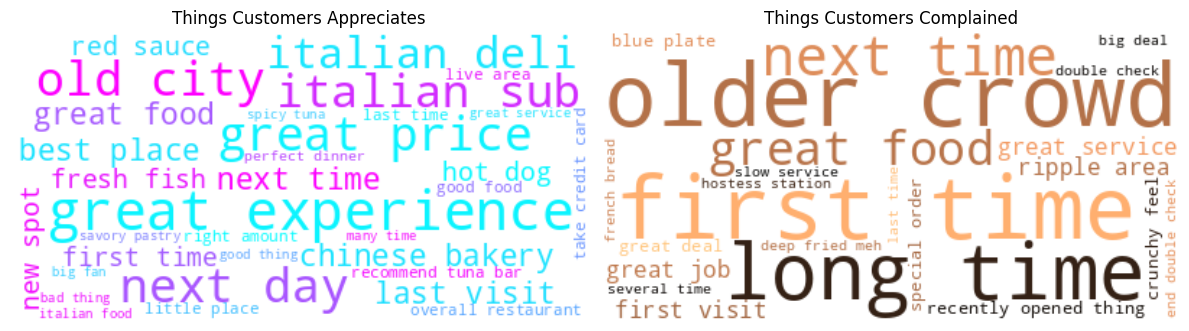

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## generating two word cloud
# Create a single figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
wordcloud1 = WordCloud(background_color='white', colormap='cool', min_font_size=8).generate_from_frequencies(tips_good)
ax1.imshow(wordcloud1, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Things Customers Appreciates')

wordcloud2 = WordCloud(background_color='white', colormap='copper', min_font_size=8).generate_from_frequencies(tips_bad)
ax2.imshow(wordcloud2, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Things Customers Complained')

# Adjust the spacing between subplots
plt.tight_layout()

After we extracted our 9 patterns, and visualized our findings, we found those useful insights below:

**Positive Reviews**: Customers appreciate several aspects of the dining establishments, such as:

* Varied and tasty cuisine options, including Italian and Chinese food.

* Enjoyable experiences in atmospheres described with terms like "old city."

* The value for money, with "great price" being a prominent positive feature.

Intentions to return, with phrases like "next day" suggesting that the dining experience was good enough to warrant another visit soon.

The customers providing positive reviews are likely to be both first-timers and returning patrons who were delighted by their experiences, from the food to the ambience and the cost.

**Negative Reviews:** On the other hand, customers had various complaints, including:

* Long waiting times, which is a significant factor in customer dissatisfaction.

* Issues with the physical space or ambiance, as suggested by terms like "older" and "crowd."

* Service speed and efficiency concerns, indicated by the phrase "slow service."

Problems with order accuracy and handling special requests, as implied by "double check" and "special order."

The customers expressing these complaints are likely those who had high expectations of a swift, efficient dining experience, perhaps influenced by the positive reviews they had read or heard about. The use of the term "first time" in the complaints could suggest that these negative experiences are especially disappointing to newcomers.

Interestingly, the phrase "next time" appears in both positive and negative contexts, indicating that despite some complaints, customers might be willing to give the establishment another chance.

  ### Topic Modelling

After generating the WordCloud, we became curious about how positive reviews are distributed across different topics. Hence, we applied topic modeling, specifically Latent Dirichlet Allocation (LDA), to explore the various topics mentioned by customers.






In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download the necessary NLTK models (if not already installed)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tips_good

great experience        4
next day                3
old city                3
great price             3
italian sub             3
                       ..
shooting oil table      1
enough u                1
cut loss head           1
greek place             1
benefitted bit sugar    1
Name: count, Length: 1025, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

# Ensure necessary NLTK resources are downloaded
nltk.download('wordnet')

# Assuming yelp_dataset['cleaned_text'] is a list of pre-processed (tokenized, cleaned) text documents
word_list = [' '.join(tokens.split()) for tokens in tips_good.index]  # if tips_good is a Series with phrases as index


# Custom CountVectorizer with lemmatization
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        lemmatizer = WordNetLemmatizer()
        analyzer = super().build_analyzer()
        return lambda doc: [lemmatizer.lemmatize(w) for w in analyzer(doc)]

# Initialize and fit the vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, min_df=2, stop_words='english', decode_error='ignore')

try:
    tf = tf_vectorizer.fit_transform(word_list)
except ValueError as e:
    print("Error with vectorizing documents: ", e)
    # Exiting if there are no terms in the vocabulary after vectorization
    import sys
    sys.exit()

# LDA Model
lda = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
lda.fit(tf)

# Function to print the top words in each topic
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = f"Topic #{index}: " + " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print("=" * 70)

# Display top words for each topic
n_top_words = 20
print("Topics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topics in LDA model:
Topic #0: italian fresh sub perfect nice tea rice taste right portion sandwich lunch fish make deli dinner past ambiance salmon piece
Topic #1: bit sugar food service sushi love sweet restaurant owner new spot wrong store staff minute tuna friendly thing long town
Topic #2: place little amazing chinatown cake cocktail bakery cute menu order try day roll clean bibimbap cash favorite tart glad kind
Topic #3: great best small price extra bread meatball table dessert place awesome quality flavor neighborhood term meal oil delicious outside ups
Topic #4: good time egg review got pepper city tasty red happy bun old tart mom excellent weekend counter savory special eggplant


#### Topic 1

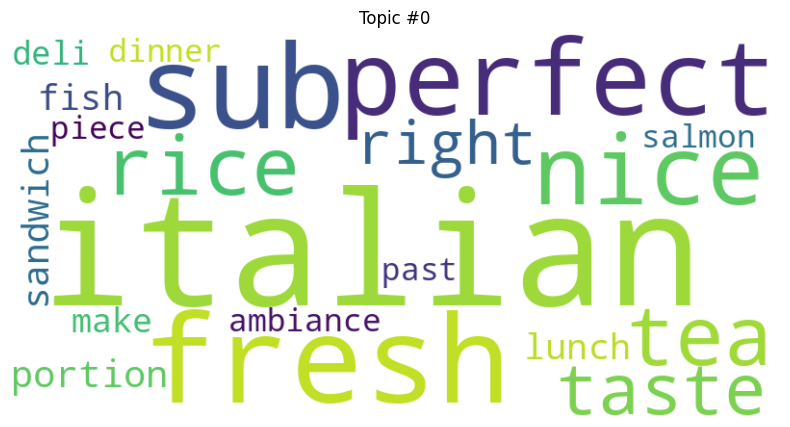

In [ ]:
# Function to generate and show a word cloud for a specific topic
def show_word_cloud(model, feature_names, topic_idx, n_words=20):
    topic = model.components_[topic_idx]
    # Generate a dictionary of word frequencies for this topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_words - 1:-1]}
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Topic #{}'.format(topic_idx))
    plt.show()

# Example usage: Show word cloud for topic 0
show_word_cloud(lda, tf_vectorizer.get_feature_names_out(), topic_idx=0)




From this wordcloud, it provides us useful findings:

Popular Descriptors: Words like "fresh," "nice," "perfect," and "taste" suggest customers place high value on the quality and flavor of their meals.

Meal Times: The prominence of words like "lunch" and "dinner" indicates these are common times for reviewing experiences, possibly reflecting peak hours for business reviews.

Cuisine Type: The word "Italian" is quite prominent, implying a significant number of reviews pertain to Italian restaurants or dishes.

#### Topic 2

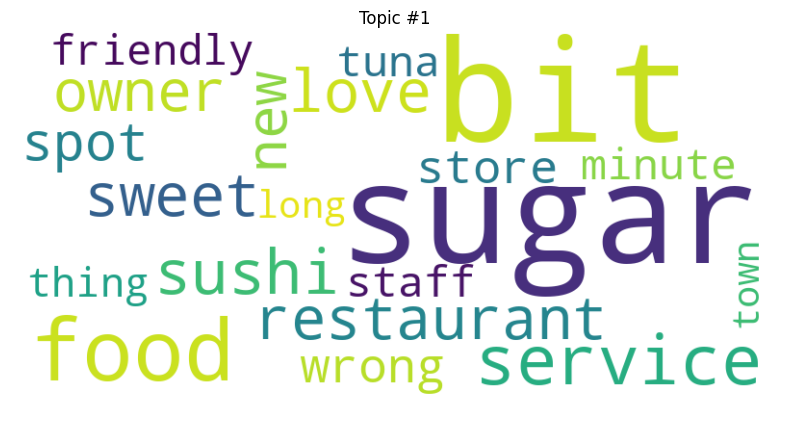

In [ ]:
# Function to generate and show a word cloud for a specific topic
def show_word_cloud(model, feature_names, topic_idx, n_words=20):
    topic = model.components_[topic_idx]
    # Generate a dictionary of word frequencies for this topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_words - 1:-1]}
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Topic #{}'.format(topic_idx))
    plt.show()

# Example usage: Show word cloud for topic 0
show_word_cloud(lda, tf_vectorizer.get_feature_names_out(), topic_idx=1)

From this wordcloud, it provides us useful findings:

**Customer Experience Perspective:**

Customer Sentiment: The word "love" indicates a strong positive sentiment towards the food or the establishment.
Menu Highlights: "Sushi" and "tuna" suggest these are likely the popular or most-mentioned items.

Service Quality: The prominence of "service," "staff," "friendly," and "owner" points to a focus on the service aspect in the reviews.

**Business Focus Perspective:**

Sugar: The large "sugar" text could mean that sweetness or perhaps a specific sweet dish is a notable topic in the reviews.

Efficiency and Attention: "Minute," "long," and "bit" may refer to the time taken for service or the portion sizes, with "wrong" potentially pointing to occasional service mishaps or mistakes.

Community Standing: "Spot" and "town" indicate the restaurant's recognition as a local establishment or favorite spot in town.

#### Topic 3

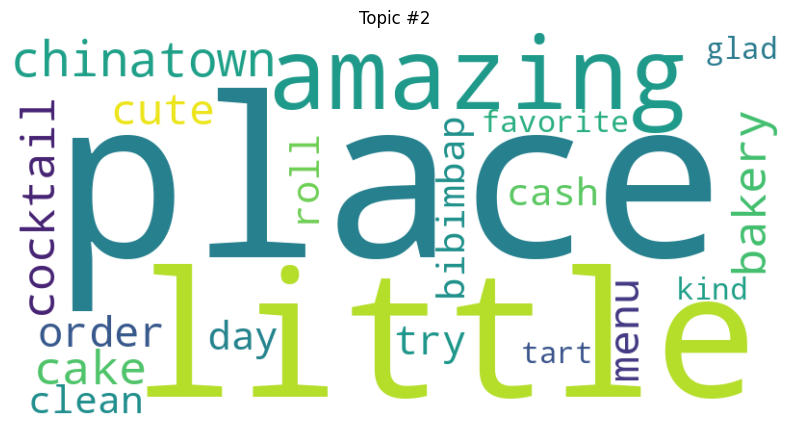

In [ ]:
# Function to generate and show a word cloud for a specific topic
def show_word_cloud(model, feature_names, topic_idx, n_words=20):
    topic = model.components_[topic_idx]
    # Generate a dictionary of word frequencies for this topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_words - 1:-1]}
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Topic #{}'.format(topic_idx))
    plt.show()

# Example usage: Show word cloud for topic 0
show_word_cloud(lda, tf_vectorizer.get_feature_names_out(), topic_idx=2)

From this wordcloud, it provides us useful findings:

Diverse Cuisine: The presence of words like "bibimbap," "bakery," and "cocktail" suggests a variety of food and drink offerings.

Positive Reviews: "Amazing," "favorite," "glad," and "cute" indicate that customers have a favorable opinion of this place.

Atmosphere and Cleanliness: The word "clean" implies an appreciation for the hygiene or tidiness of the place.

Location Specific: "Chinatown" suggests that this establishment is located in or associated with a Chinatown area, which could imply a variety of ethnic cuisines available.

#### Topic 4

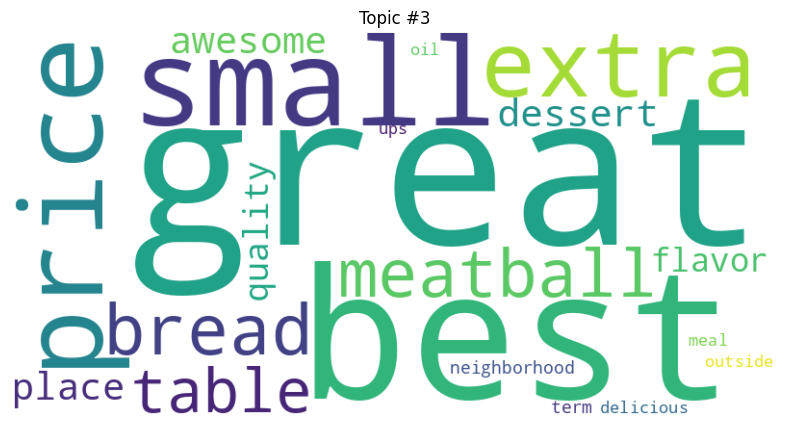

In [ ]:
# Function to generate and show a word cloud for a specific topic
def show_word_cloud(model, feature_names, topic_idx, n_words=20):
    topic = model.components_[topic_idx]
    # Generate a dictionary of word frequencies for this topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_words - 1:-1]}
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Topic #{}'.format(topic_idx))
    plt.show()

# Example usage: Show word cloud for topic 0
show_word_cloud(lda, tf_vectorizer.get_feature_names_out(), topic_idx=3)

From this wordcloud, it provides us useful findings:


High Satisfaction: Words like "awesome," "great," "best," and "delicious" suggest a high level of customer satisfaction with the food and overall experience.

Food Focus: "Bread," "meatball," "dessert," and "flavor" indicate specific food items or aspects that are frequently mentioned and likely appreciated by customers.

Value for Money: The word "price" alongside positive adjectives could imply that customers feel they are getting good value.

#### Topic 5

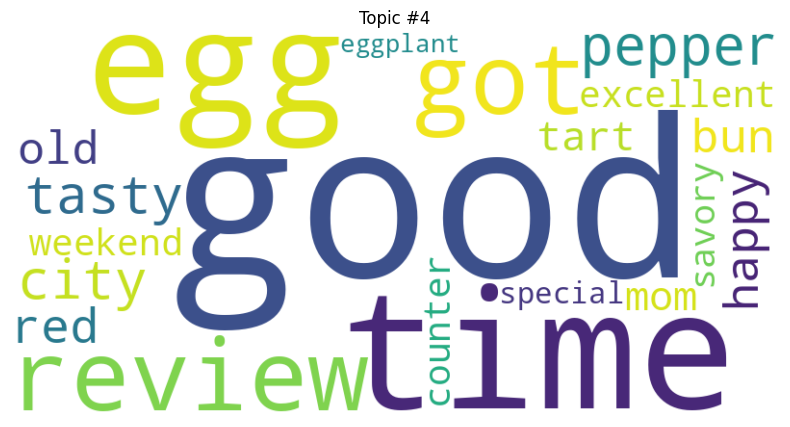

In [ ]:
# Function to generate and show a word cloud for a specific topic
def show_word_cloud(model, feature_names, topic_idx, n_words=20):
    topic = model.components_[topic_idx]
    # Generate a dictionary of word frequencies for this topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_words - 1:-1]}
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Topic #{}'.format(topic_idx))
    plt.show()

# Example usage: Show word cloud for topic 0
show_word_cloud(lda, tf_vectorizer.get_feature_names_out(), topic_idx=4)

From this wordcloud, it provides us useful findings:


Positive Feedback: "Good," "excellent," "tasty," and "happy" suggest that the reviews are generally positive regarding the food and the experience.

Food Items and Attributes: "Egg," "pepper," "bun," and "savory" highlight specific ingredients and flavors that are noteworthy in the customer experience.

"Special" and "weekend" could indicate that certain meals or offers are considered exceptional or are available at specific times.

Service and Atmosphere: "Counter" may refer to a service style or the physical setup of the place, suggesting a casual dining atmosphere.

"City" and "review" imply that the establishment is urban and that customers take the time to post reviews, which likely contributes to its reputation.

In summary, customers value quality food and dining experiences, show preference for specific locations and cuisines, and have considerations regarding portion size, sweetness of dishes, and the value for the price paid.

### Word2Vec

From the word clouds generated through our topic modeling, we observed several frequently occurring keywords. Thus, we selected five of these keywords that are most likely associated with our target common words, including "Italian," "sugar" "place" "best" and "good"

In [ ]:
import re
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
from nltk.corpus import stopwords

In [ ]:
# Converting phrases to list of words
sentences = [phrase.split() for phrase in tips_good.index]  # Assuming 'tips_good' is a Series

# Train a Word2Vec model
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=2, workers=4, sg=1)

#window:5 the model will look at 5 words before and 5 words after it to understand its context and usage.

#### Words Next to Italian

In [ ]:
model.predict_output_word(['italian'], topn=10)

[('mom', 0.0020536627),
 ('specialty', 0.002053651),
 ('shop', 0.00205362),
 ('bake', 0.0020536114),
 ('neighborhood', 0.0020536082),
 ('fishtown', 0.0020536003),
 ('legend', 0.0020535928),
 ('share', 0.002053588),
 ('opening', 0.0020535868),
 ('deli', 0.0020535842)]

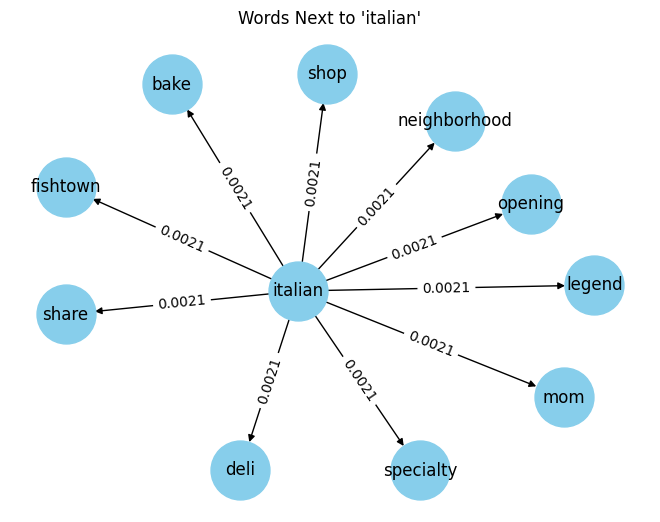

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you already have a trained Word2Vec model named 'model'
similar_words = model.predict_output_word(['italian'], topn=10)

# Create a directed graph
G = nx.DiGraph()

# Add edges between 'service' and its similar words
for word, similarity in similar_words:
    G.add_edge('italian', word, weight=similarity)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1800, font_size=12, edge_color='black', linewidths=1, arrows=True)

# Draw edge labels
edge_labels = {(n1, n2): f"{d['weight']:.4f}" for n1, n2, d in G.edges(data=True)}  # Formatting similarity values to four decimal places
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Words Next to 'italian'")
plt.show()


The network graph indicates "Italian" is frequently associated with words that suggest community involvement ("neighborhood"), family-run establishments ("mom"), specialty offerings ("specialty"), and culinary businesses ("shop," "deli," "bake"), reflecting a strong community and family presence in Italian culinary experiences.

#### Words Next to Sugar

In [ ]:
model.predict_output_word(['sugar'], topn=10)

[('watch', 0.0020538305),
 ('really', 0.0020537137),
 ('home', 0.002053643),
 ('bit', 0.0020536415),
 ('minute', 0.0020535942),
 ('perfect', 0.002053587),
 ('ice', 0.0020535835),
 ('creamy', 0.0020535768),
 ('recommend', 0.0020535751),
 ('intake', 0.0020535744)]

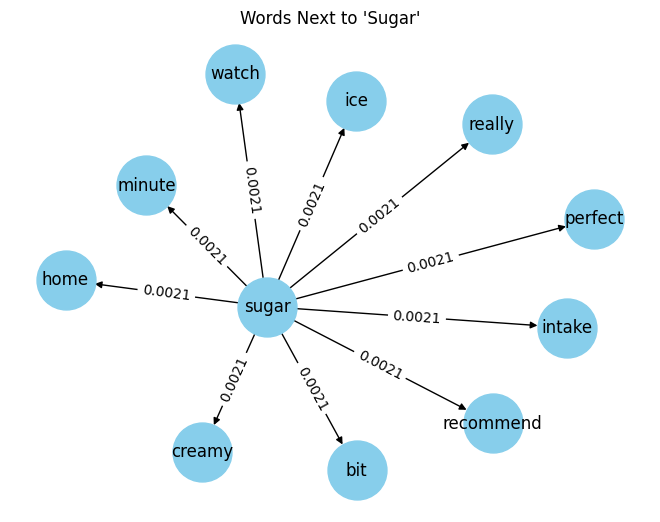

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you already have a trained Word2Vec model named 'model'
similar_words = model.predict_output_word(['sugar'], topn=10)

# Create a directed graph
G = nx.DiGraph()

# Add edges between 'service' and its similar words
for word, similarity in similar_words:
    G.add_edge('sugar', word, weight=similarity)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1800, font_size=12, edge_color='black', linewidths=1, arrows=True)

# Draw edge labels
edge_labels = {(n1, n2): f"{d['weight']:.4f}" for n1, n2, d in G.edges(data=True)}  # Formatting similarity values to four decimal places
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Words Next to 'Sugar'")
plt.show()


The graph suggests that "sugar" is often mentioned in the context of food quality and experience, with associations to words like "perfect," "creamy," and "home," indicating a positive sentiment toward sweet or dessert items. It may also reflect customer attentiveness to sugar content ("intake") and enjoyment ("recommend").

#### Words Next to Place

In [ ]:
model.predict_output_word(['place'], topn=10)

[('wrong', 0.0020538436),
 ('ambiance', 0.0020538247),
 ('head', 0.0020537374),
 ('cute', 0.0020536918),
 ('smaller', 0.0020536764),
 ('owner', 0.0020536757),
 ('home', 0.0020536468),
 ('find', 0.0020536433),
 ('service', 0.00205363),
 ('card', 0.0020536236)]

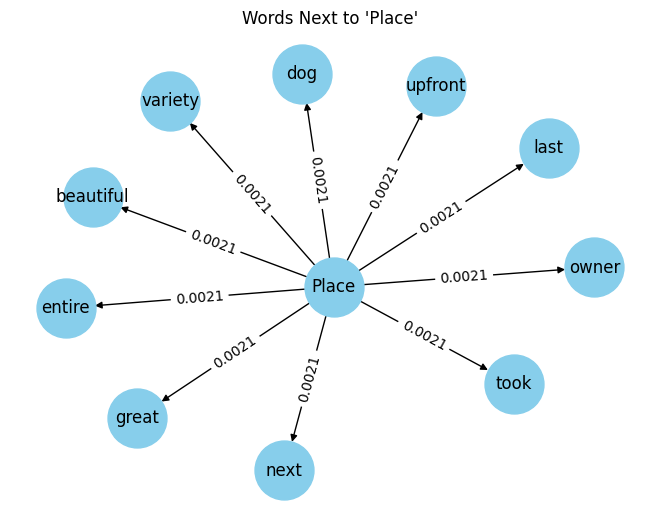

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you already have a trained Word2Vec model named 'model'
similar_words = model.predict_output_word(['time'], topn=10)

# Create a directed graph
G = nx.DiGraph()

# Add edges between 'service' and its similar words
for word, similarity in similar_words:
    G.add_edge('Place', word, weight=similarity)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1800, font_size=12, edge_color='black', linewidths=1, arrows=True)

# Draw edge labels
edge_labels = {(n1, n2): f"{d['weight']:.4f}" for n1, n2, d in G.edges(data=True)}  # Formatting similarity values to four decimal places
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Words Next to 'Place'")
plt.show()


The graph suggests that "Place" is commonly associated with words that describe positive attributes ("great," "beautiful"), variety, and ownership ("owner"). It may also relate to the timing or sequence of a visit ("last," "next," "entire"). The mention of "dog" could indicate pet-friendly establishments.


#### Words Next to Good

In [ ]:
model.predict_output_word(['good'], topn=10)

[('bread', 0.0020537388),
 ('deal', 0.002053733),
 ('food', 0.0020537302),
 ('table', 0.0020537067),
 ('back', 0.002053702),
 ('ton', 0.0020537002),
 ('rice', 0.0020536717),
 ('customer', 0.0020536557),
 ('spot', 0.0020536506),
 ('counter', 0.0020536368)]

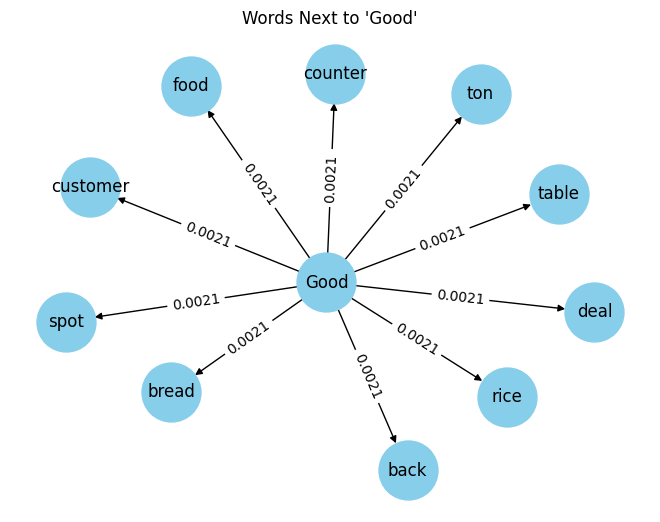

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you already have a trained Word2Vec model named 'model'
similar_words = model.predict_output_word(['good'], topn=10)

# Create a directed graph
G = nx.DiGraph()

# Add edges between 'service' and its similar words
for word, similarity in similar_words:
    G.add_edge('Good', word, weight=similarity)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1800, font_size=12, edge_color='black', linewidths=1, arrows=True)

# Draw edge labels
edge_labels = {(n1, n2): f"{d['weight']:.4f}" for n1, n2, d in G.edges(data=True)}  # Formatting similarity values to four decimal places
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Words Next to 'Good'")
plt.show()


The Word2Vec model's output suggests that the word "good" is frequently associated with terms such as "bread," "deal," "food," "table," "back," and others, each accompanied by a probability score.

In this context, it's highlights that the word "good" is commonly used in phrases like "good bread," "good deal," or "good food," indicating positive evaluations of these items or experiences. The associations with words like "table," "back," and "counter" might suggest positive experiences related to restaurant settings or customer service.



#### Words Next to Best

In [ ]:
model.predict_output_word(['best'], topn=10)

[('meatball', 0.002054003),
 ('philadelphia', 0.0020537863),
 ('head', 0.0020537404),
 ('vibe', 0.0020537083),
 ('smile', 0.0020536669),
 ('bread', 0.002053661),
 ('term', 0.0020536436),
 ('red', 0.002053615),
 ('past', 0.0020536121),
 ('cashier', 0.0020536121)]

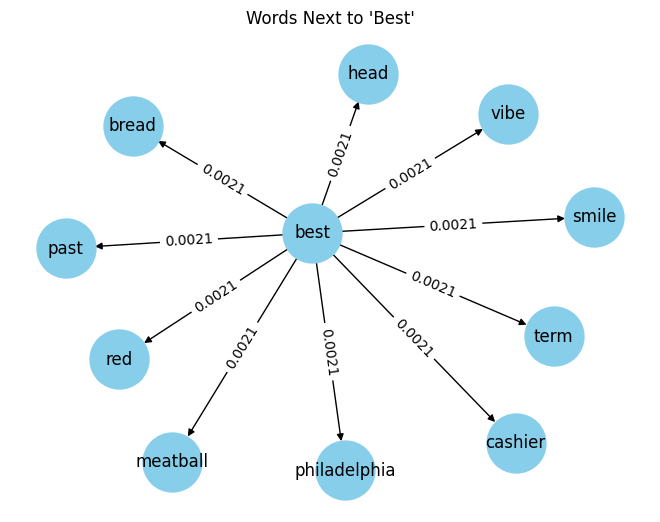

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you already have a trained Word2Vec model named 'model'
similar_words = model.predict_output_word(['best'], topn=10)

# Create a directed graph
G = nx.DiGraph()

# Add edges between 'service' and its similar words
for word, similarity in similar_words:
    G.add_edge('best', word, weight=similarity)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1800, font_size=12, edge_color='black', linewidths=1, arrows=True)

# Draw edge labels
edge_labels = {(n1, n2): f"{d['weight']:.4f}" for n1, n2, d in G.edges(data=True)}  # Formatting similarity values to four decimal places
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Words Next to 'Best'")
plt.show()


The Word2Vec model's output indicates that the word "best" is frequently associated with a diverse range of terms, including "meatball," "philadelphia," "head," "vibe," and others, each accompanied by a probability score.



####Analysis

Italian Food: When people think of Italian food, they often think of family-run places in their neighborhood that offer special dishes. It's all about community and tradition.

Sweet Treats: People really like desserts! They use words like "perfect" and "creamy" to describe them, making them feel at home.

Nice Places: Restaurants and shops are often seen as great and beautiful, especially when they're run by local owners.

Good Food: People use the word "good" a lot when they talk about food and dining. It's their way of saying they had a nice time and enjoyed their meal.

--> These findings can help businesses by:

Tailoring menus and experiences to emphasize community and tradition in Italian cuisine.

Highlighting dessert offerings to capitalize on positive sentiment towards sweet treats.

Focusing on creating welcoming environments run by local owners to enhance customer satisfaction and loyalty


### Glove Word Embeddings

Another way to closely examine words around the target words is by using GloVe Word Embeddings.

We utilized the first topic generated by LDA, which includes keywords such as "italian", "fresh", "sub", "perfect", "nice", "tea", "rice", "taste", "right", "portion", "sandwich", "lunch", "fish", "make", "deli", "dinner", "past", "ambiance", "salmon", "piece" for this text mining analysis.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from torchtext.vocab import GloVe
import numpy as np

# Load pre-trained word embeddings
embedding_name = '6B'  # 'glove.6B.100d'
vec = GloVe(name=embedding_name, dim=100)

.vector_cache/glove.6B.zip: 862MB [02:40, 5.38MB/s]                           
100%|█████████▉| 399999/400000 [00:28<00:00, 14056.73it/s]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


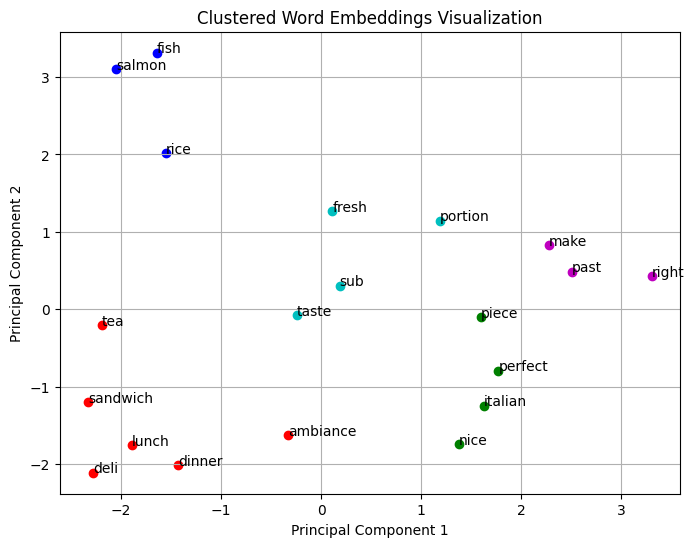

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from torchtext.vocab import GloVe
from sklearn.cluster import KMeans

# Load pre-trained word embeddings
embedding_name = '6B'  # 'glove.6B.100d'
vec = GloVe(name=embedding_name, dim=100)

# Words related to food and dining experiences (from Topic #4)
topic_words = ["italian", "fresh", "sub", "perfect", "nice", "tea", "rice", "taste", "right", "portion",
                 "sandwich", "lunch", "fish", "make", "deli", "dinner", "past", "ambiance", "salmon", "piece"]

# Function to get word embeddings for a list of words
def get_word_embeddings(words):
    word_embeddings = vec.get_vecs_by_tokens(words, lower_case_backup=True)
    return word_embeddings

# Perform PCA to reduce the dimensionality to 2D
def reduce_dimensionality(word_embeddings):
    pca = PCA(n_components=2)
    word_embeddings_2d = pca.fit_transform(word_embeddings)
    return word_embeddings_2d

# Function to cluster word embeddings using K-means
def cluster_word_embeddings(word_embeddings_2d, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(word_embeddings_2d)
    return clusters

# Function to visualize clustered word embeddings in 2D space
def visualize_clustered_word_embeddings(word_embeddings_2d, clusters, words, title):
    plt.figure(figsize=(8, 6))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i, word in enumerate(words):
        plt.scatter(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1], c=colors[clusters[i]])
        plt.text(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1], word)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Get word embeddings for the topic words
topic_word_embeddings = get_word_embeddings(topic_words)

# Reduce dimensionality to 2D
word_embeddings_2d = reduce_dimensionality(topic_word_embeddings)

# Cluster word embeddings using K-means
num_clusters = 5  # You can adjust the number of clusters as needed
clusters = cluster_word_embeddings(word_embeddings_2d, num_clusters)

# Visualize clustered word embeddings in 2D space
visualize_clustered_word_embeddings(word_embeddings_2d, clusters, topic_words, 'Clustered Word Embeddings Visualization')


The glove word embeddings visualized that keywords such as tea, sandwich, lunch, deli, and dinner are clustered closely together. Although the word 'ambiance' appears distant from this group, it may still hold relevance within the broader context.

### Bag-Of-Word N-grams

We chose to employ a method focusing on two- and three-grams to understand the reasons behind negative customer reviews. We specifically selected 1000 samples from our dataset featuring ratings lower than 2, aiming to highlight the negative customer experience.

#### Bi-grams and Three-grams

In [ ]:
bad_reviews

23     become go place shoe reward member often send ...
24     oh enjoy famous footwear occasional bogo clear...
30     waited several minute waiting order car waitin...
31     hidden sonic seems come nowhere food standard ...
32     went one waitress go denny often remember food...
                             ...                        
843    standing min three people ahead u one ordering...
844    went subway last evening employee store guy st...
846    pool store cost money dropped pool cleaner mon...
850    reason came great deal oil change groupon boug...
851    bought tire sears got warranty package road ha...
Name: cleaned_text, Length: 100, dtype: object

In [ ]:
## split into good and negative reviews
bad_reviews = yelp_dataset['cleaned_text'][yelp_dataset['stars_x'] < 2][:1000]

In [ ]:
import nltk
from nltk.util import ngrams
from collections import Counter
import pandas as pd
import string

def get_ngrams(tokens, n):
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Assuming 'bad_reviews' is a Series containing phrases with index
sentences = [index.split() for index in bad_reviews]

# Flatten the list of token lists and remove punctuation
flattened_tokens = [token for sentence in sentences for token in sentence if token not in string.punctuation]

bigrams = get_ngrams(flattened_tokens,2)
bigrams_count = Counter(bigrams)

# Create DataFrame for bigrams and print the top 10 most frequent ones
bigram_freq = pd.DataFrame.from_dict(bigrams_count, orient='index', columns=['frequency'])
bigram_freq = bigram_freq.sort_values(by='frequency', ascending=False).head(10)
print(bigram_freq)

                   frequency
customer service         216
house beauty              96
drive thru                81
tour guide                63
oil change                54
first time                53
make sure                 52
insurance company         45
food tour                 45
ordered product           45


In [ ]:
import nltk
from nltk.util import ngrams
from collections import Counter
import pandas as pd
import string

def get_ngrams(tokens, n):
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Assuming 'bad_reviews' is a Series containing phrases with index
sentences = [index.split() for index in bad_reviews]

# Flatten the list of token lists and remove punctuation
flattened_tokens = [token for sentence in sentences for token in sentence if token not in string.punctuation]

# Generate trigrams
trigrams = get_ngrams(flattened_tokens, 3)

# Count the frequency of trigrams
trigrams_count = Counter(trigrams)

# Create DataFrame for trigrams and print the top 10 most frequent ones
trigram_freq = pd.DataFrame.from_dict(trigrams_count, orient='index', columns=['frequency'])
trigram_freq = trigram_freq.sort_values(by='frequency', ascending=False).head(10)
print(trigram_freq)


                           frequency
terrible customer service         33
hard earned money                 18
respond email phone               18
place order online                18
called customer service           18
previous tenant dog               18
waste time money                  18
half sausage half                 18
hand tied hair                    18
covered warranty called           18


In [ ]:
import plotly.express as px

# Combine the dataframes for a unified plot with identification for each gram type
bigram_freq['n-gram'] = 'Bigram'
trigram_freq['n-gram'] = 'Trigram'

# Concatenate only bigram and trigram dataframes
combined_df = pd.concat([bigram_freq, trigram_freq])

# Filter out fourgram data if it exists
if 'fourgram_freq' in locals():
    combined_df = pd.concat([combined_df, fourgram_freq])  # You can remove this line if not applicable

# Filter combined_df to include only bigrams and trigrams
combined_df = combined_df[combined_df.index.str.split().map(len).isin([2, 3])]

# Make the index a column for easier plotting
combined_df['N-gram Words'] = combined_df.index

# Create the plot
fig = px.bar(combined_df, x='N-gram Words', y='frequency', color='n-gram',
             title='Comparison of Top N-grams', labels={'N-gram Words': 'N-grams', 'frequency': 'Frequency'},
             barmode='group', height=600, width=1200)

# Customize the layout for better visibility
fig.update_layout(xaxis_title='N-grams',
                  yaxis_title='Frequency',
                  xaxis={'categoryorder': 'total descending'},
                  legend_title_text='N-Gram Type',
                  xaxis_tickangle=-90)

# Show the plot
fig.show()


In analyzing the bad reviews from the Yelp dataset, using the bag-of-word n-grams, several key findings include:

Customer Service: The most frequent bigram in negative reviews is "customer service," appearing 216 times. This indicates that poor customer service experiences are a significant pain point for customers who leave negative reviews.

House Beauty: The phrase "house beauty" appears frequently, indicating potential dissatisfaction with home-related services or products.

Drive Thru: Negative reviews often mention "drive thru," suggesting issues or dissatisfaction with service speed, accuracy, or quality at drive-thru locations.

Tour Guide: The term "tour guide" is mentioned frequently, indicating possible negative experiences with tour guide services, such as lack of information, professionalism, or satisfaction with the tour experience.

Oil Change: Negative reviews frequently mention "oil change," possibly indicating dissatisfaction with automotive service experiences.

First Time: "First time" is mentioned frequently, suggesting that negative reviewers might have had disappointing initial experiences with businesses or services.


Bigrams capture general experiences along with their aspects, such as "customer service" and "drive through."

Trigrams, on the other hand, depict more specific experiences, like "terrible customer experience" and "previous tenant dogs."

However, sometimes there's a lack of context, like in the phrase "terrible customer service," where the reason for it being terrible isn't explained.

In summary, bigrams provide a general overview, including aspects like "drive-through" or "customer service," while trigrams offer a more detailed insight into experiences, highlighting specific feelings or actions, such as "waste time money" or "place order online."

# Predictive Analysis

The purpose of this predictive analysis is to predict sentiments from customer reviews.

We will use the accuracy level to select the best model for sentiment prediction.

We have utilized 7 models to conduct our analysis:

1. Bag of words with Multinomial Naive Bayes
2. TF-IDF with Multinomial Naive Bayes
3. Pretrained Naive Bayes
4. LSTM
5. RNN
6. BERT
7. RoBERTa

## Bag-of-Words with MultinomialNB

The model uses a bag-of-words approach to convert text reviews into numerical data, classifies reviews into three sentiment categories (neutral, negative, positive), and then uses a Multinomial Naive Bayes algorithm to predict the sentiment of each review. Finally, the code assesses the accuracy of the model in correctly classifying the sentiment of reviews.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Categorize reviews in the Yelp dataset into three sentiment categories—neutral, negative, and positive—based on the number of stars given in each review.

Reviews with 3 stars are labeled as 'neutral', those with fewer than 3 stars as 'negative', and those with more than 3 stars as 'positive'.

In [ ]:
yelp_dataset.loc[yelp_dataset['stars_x'] == 3, 'sentiment'] = 'neutral'
yelp_dataset.loc[yelp_dataset['stars_x'] < 3, 'sentiment'] = 'negative'
yelp_dataset.loc[yelp_dataset['stars_x'] > 3, 'sentiment'] = 'positive'

In [ ]:
# Importing libraries
from sklearn.feature_extraction.text import CountVectorizer

# Creating the Bag of Words model
cv = CountVectorizer(max_features=2500, binary=True, ngram_range=(1, 3))

# 'Cleaned_text' column already exists in yelp_dataset
X = cv.fit_transform(yelp_dataset['cleaned_text']).toarray()

# Mapping sentiment labels
sentiment_map = {'neutral': 0, 'positive': 1, 'negative': 2}

yelp_dataset['sentiment'] = yelp_dataset['sentiment'].map(sentiment_map)

yelp_dataset['sentiment']

0        1
1        0
2        0
3        0
4        1
        ..
99995    1
99996    1
99997    2
99998    2
99999    2
Name: sentiment, Length: 100000, dtype: int64

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, yelp_dataset['sentiment'], test_size=0.20, random_state=42)

# Creating and training the Multinomial Naive Bayes model
sentiment_detect_model = MultinomialNB().fit(X_train, y_train)

# Making predictions on the test set
y_pred = sentiment_detect_model.predict(X_test)

# Calculating accuracy
score = accuracy_score(y_test, y_pred)
print("Accuracy:", score)

Accuracy: 0.7895


## TFIDF with Multinominal Naive Bayes

The main purpose of the code is to train and test a sentiment analysis model on the Yelp dataset using the TF-IDF (Term Frequency-Inverse Document Frequency) method to transform text reviews into numerical form. This method weights words based on their importance, which is then used to train a Multinomial Naive Bayes classifier. The goal is to predict the sentiment of reviews as either neutral, positive, or negative, and to evaluate the model's accuracy in classifying these sentiments correctly.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Define corpus and y
corpus = yelp_dataset['cleaned_text']
y = yelp_dataset['sentiment']

# Creating the TF-IDF vectorizer
tv = TfidfVectorizer(max_features=2500, ngram_range=(1,3))
X = tv.fit_transform(corpus).toarray()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Creating and training the Multinomial Naive Bayes model
tfdif_detect_model = MultinomialNB().fit(X_train, y_train)

# Making predictions on the test set
y_pred = tfdif_detect_model.predict(X_test)

# Calculating and printing the accuracy score
score = accuracy_score(y_test, y_pred)
print("Accuracy:", score)


Accuracy: 0.83055


## Pretrainned Naive Bayes (Text Bob)

The main purpose of the code is to use TextBlob, a library that provides simple natural language processing tools, to predict the sentiment of text reviews as either positive or negative based on their polarity. The code then assesses the accuracy of these sentiment predictions against actual sentiment labels in the test dataset, effectively evaluating how well TextBlob performs this sentiment analysis task.

In [ ]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score

# Define a function to use TextBlob to make sentiment prediction
def sentiment_textblob(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity >= 0:
        return 1  # Positive sentiment
    else:
        return 0  # Negative sentiment

# Convert X_test from array to list of strings
X_test_text = [str(text) for text in X_test]

# Make predictions using TextBlob on the test set
y_pred_textblob = [sentiment_textblob(text) for text in X_test_text]

# Calculate accuracy for TextBlob predictions
accuracy_textblob = accuracy_score(y_test, y_pred_textblob)
print("Accuracy using TextBlob:", accuracy_textblob)

Accuracy using TextBlob: 0.7879


## LSTM

The main purpose of the code is to train a deep learning model to classify text data into categories (likely binary sentiment analysis) using a sequence processing architecture (LSTM). The code processes text data into numerical sequences, prepares these sequences for training by padding them, and uses these sequences to train an LSTM model. The model aims to predict the category of each text input, evaluates its performance through training, and optimizes its parameters for better accuracy.

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN
from sklearn.model_selection import train_test_split

In [ ]:
X = yelp_dataset['text'].values
y = yelp_dataset['sentiment'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
max_seq_length = max([len(seq) for seq in X_seq])
X_pad = pad_sequences(X_seq, maxlen=max_seq_length)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_seq_length))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)


Epoch 1/5
563/563 [==============================] - 811s 1s/step - loss: -0.2043 - accuracy: 0.8191 - val_loss: -1.2295 - val_accuracy: 0.8695
Epoch 2/5
563/563 [==============================] - 1046s 2s/step - loss: -2.1185 - accuracy: 0.8995 - val_loss: -3.1365 - val_accuracy: 0.9080
Epoch 3/5
563/563 [==============================] - 816s 1s/step - loss: -3.6037 - accuracy: 0.9051 - val_loss: -4.5820 - val_accuracy: 0.9072
Epoch 4/5
563/563 [==============================] - 774s 1s/step - loss: -5.0983 - accuracy: 0.9192 - val_loss: -6.0916 - val_accuracy: 0.9180
Epoch 5/5
563/563 [==============================] - 787s 1s/step - loss: -6.4695 - accuracy: 0.9183 - val_loss: -7.3216 - val_accuracy: 0.8829


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

625/625 [==============================] - 81s 130ms/step - loss: -7.3101 - accuracy: 0.8859
Test Accuracy: 0.8859000205993652


## RNN

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_seq_length))
model.add(SimpleRNN(units=64))  # Simple RNN layer
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)


Epoch 1/5
563/563 [==============================] - 443s 785ms/step - loss: -0.7330 - accuracy: 0.8414 - val_loss: -2.8367 - val_accuracy: 0.8956
Epoch 2/5
563/563 [==============================] - 407s 723ms/step - loss: -0.9715 - accuracy: 0.8113 - val_loss: -0.9671 - val_accuracy: 0.8095
Epoch 3/5
563/563 [==============================] - 411s 731ms/step - loss: -2.6710 - accuracy: 0.8532 - val_loss: -4.5626 - val_accuracy: 0.8724
Epoch 4/5
563/563 [==============================] - 411s 730ms/step - loss: -6.1618 - accuracy: 0.8895 - val_loss: -8.3292 - val_accuracy: 0.8921
Epoch 5/5
563/563 [==============================] - 411s 730ms/step - loss: -9.6705 - accuracy: 0.9025 - val_loss: -11.9337 - val_accuracy: 0.9049


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

625/625 [==============================] - 43s 69ms/step - loss: -11.8148 - accuracy: 0.9060
Test Accuracy: 0.906000018119812


In conclusion, the Recurrent Neural Network (RNN) model performed the best with 90% accuracy.

The limitations noted for each model are that Bag-of-words and TFIDF don't take into account the order of words, which can impact their accuracy. LSTM's effectiveness can depend on having a large and diverse dataset. RNNs might miss important sentiments if a review contains a lot of irrelevant details before mentioning the key points.